In [ ]:
!pip install deepface

In [3]:
from deepface import DeepFace
import itertools


%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [4]:
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib"]
metrics = ["cosine", "euclidean", "euclidean_l2"]
backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface', 'mediapipe']

face_list = ['guang.jpg', 'ly1.jpg', 'ly2.jpg', 'ly3.jpg', 'ly4.jpg', 'xhm.jpg']

In [ ]:
for img in face_list:
  face = DeepFace.detectFace(img_path = img, target_size = (224, 224), detector_backend = backends[3])
  plt.imsave("rec_"+img, face)

In [99]:
rec_face_list = list(map(lambda x: "rec_" + x, face_list)) 

In [100]:
from PIL import Image, ImageOps
img = Image.open(face_list[0])
size = (64,64)

imgs = [ImageOps.fit(Image.open(img), size, Image.ANTIALIAS) for img in rec_face_list ]
imgs = map(np.array, imgs)
t = list(imgs)
ha=np.hstack(t)
va=np.vstack(t)

In [112]:
cell_text = []
colors = []
l = len(face_list)
#cmp_list = list(itertools.combinations(face_list, 2))
for i in range(l):
  for j in range(l):
    if i == j:
      cell_text.append("")
      colors.append('w')
    else:
      result = DeepFace.verify(img1_path = rec_face_list[i], img2_path = rec_face_list[j], model_name=models[6], detector_backend=backends[3])
      if result['verified']:
        colors.append('g')
      else:
        colors.append('r')
      cell_text.append("distance: {distance:.2f}\n threshold: {threshold}".format_map(result))

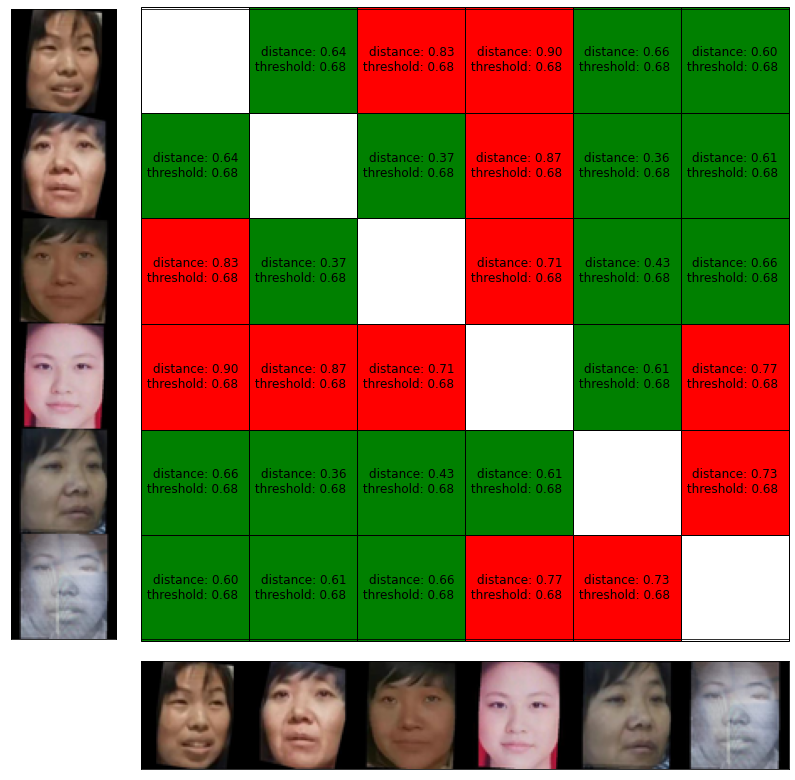

In [119]:
cell_text = np.array(cell_text).reshape(-1,6)
colors = np.array(colors).reshape(-1,6)
# Set up the axes with gridspec
fig = plt.figure(figsize=(14, 14))
grid = plt.GridSpec(6, 6)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_axi = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_axi = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)


main_ax.axes.get_xaxis().set_visible(False)
main_ax.axes.get_yaxis().set_visible(False)
table = main_ax.table(cellText=cell_text, cellColours=colors, loc='center')
table.scale(1,8.8)
table.auto_set_font_size(False)
table.set_fontsize(12)

x_axi.axes.get_xaxis().set_visible(False)
x_axi.axes.get_yaxis().set_visible(False)
y_axi.axes.get_xaxis().set_visible(False)
y_axi.axes.get_yaxis().set_visible(False)
x_axi.imshow(ha)
y_axi.imshow(va)



In [103]:
DeepFace.verify(img1_path = face_list[2], img2_path = face_list[3], model_name=models[6], detector_backend=backends[3])

{'detector_backend': 'mtcnn',
 'distance': 0.6078404523502298,
 'model': 'ArcFace',
 'similarity_metric': 'cosine',
 'threshold': 0.68,
 'verified': True}

In [104]:
DeepFace.verify(img1_path = rec_face_list[2], img2_path = rec_face_list[3], model_name=models[6], detector_backend=backends[3])

{'detector_backend': 'mtcnn',
 'distance': 0.7057490458952032,
 'model': 'ArcFace',
 'similarity_metric': 'cosine',
 'threshold': 0.68,
 'verified': False}

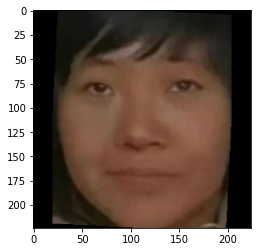

In [93]:
face = DeepFace.detectFace(img_path = 'ly2.jpg', target_size = (224, 224), detector_backend = backends[3])
plt.imshow(face)
plt.show()